# Introduction



TA-Lib (Technical Analysis Library) is a widely used open-source software library that provides a comprehensive set of tools and functions for performing technical analysis on financial markets data. It is primarily used by traders, analysts, and developers to create trading strategies and analyze financial market trends using various technical indicators.

TA-Lib offers a wide range of functions that allow users to calculate and plot common technical indicators such as moving averages, relative strength index (RSI), moving average convergence divergence (MACD), Bollinger Bands, and more. These indicators are widely used in technical analysis to identify potential entry and exit points for trades.

The library supports various programming languages, including Python, Java, C/C++, and more, making it accessible to a broad audience of developers and analysts. TA-Lib can be integrated into trading platforms, quantitative analysis tools, and other financial software applications.

In [3]:
pip install TA

  Preparing metadata (setup.py) ... done
  Created wheel for TA: filename=ta-0.10.2-py3-none-any.whl size=29088 sha256=5c1de921f87d374bb11853d5859208dc26399f9d3994096b91ed732b27e08666
  Stored in directory: /Users/chandrajason/Library/Caches/pip/wheels/dd/a5/1b/04c9ab22e30c7d2c1810f0441356918ff458b493b4efaf5249
Successfully built TA
Note: you may need to restart the kernel to use updated packages.


[*********************100%%**********************]  1 of 1 completed


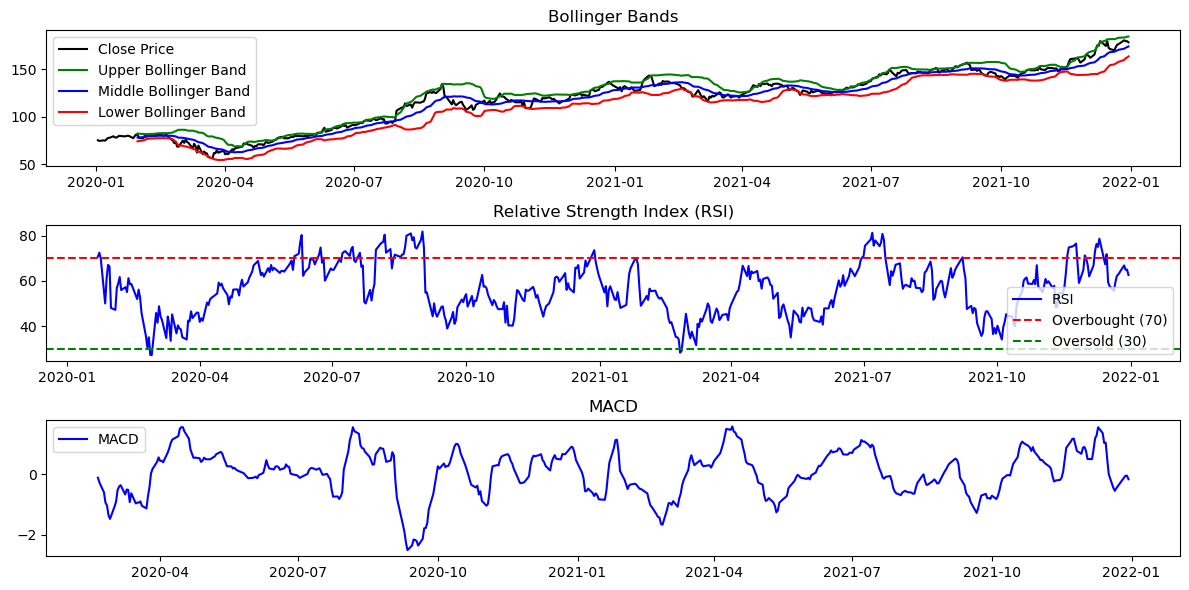

In [6]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import ta

# Fetch historical price data from Yahoo Finance
ticker_symbol = 'AAPL'  # Replace with the desired stock symbol
start_date = '2020-01-01'
end_date = '2021-12-31'
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Calculate Bollinger Bands using the ta library
bollinger = ta.volatility.BollingerBands(data['Close'])
data['upper'] = bollinger.bollinger_hband()
data['middle'] = bollinger.bollinger_mavg()
data['lower'] = bollinger.bollinger_lband()

# Calculate RSI and MACD using the ta library
data['rsi'] = ta.momentum.RSIIndicator(data['Close']).rsi()
data['macd'] = ta.trend.MACD(data['Close']).macd_diff()

# Plot the indicators
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(data['Close'], label='Close Price', color='black')
plt.plot(data['upper'], label='Upper Bollinger Band', color='green')
plt.plot(data['middle'], label='Middle Bollinger Band', color='blue')
plt.plot(data['lower'], label='Lower Bollinger Band', color='red')
plt.title('Bollinger Bands')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(data['rsi'], label='RSI', color='blue')
plt.axhline(y=70, color='r', linestyle='--', label='Overbought (70)')
plt.axhline(y=30, color='g', linestyle='--', label='Oversold (30)')
plt.title('Relative Strength Index (RSI)')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(data['macd'], label='MACD', color='blue')
plt.title('MACD')
plt.legend()

plt.tight_layout()
plt.show()
